In [1]:
import pandas as pd  
import numpy as np  
import seaborn as sns  
import matplotlib.pyplot as plt  
from sklearn.model_selection import train_test_split, GridSearchCV  
from sklearn.linear_model import LinearRegression  
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor  
from sklearn.svm import SVR  
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error  
from sklearn.preprocessing import LabelEncoder, OneHotEncoder, StandardScaler, PowerTransformer  
from sklearn.feature_selection import SelectKBest, f_regression

In [2]:
data = pd.read_csv('CarPrice_Assignment.csv')

In [3]:
df = pd.DataFrame(data)

In [4]:
df.head()

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [5]:
df.shape

(205, 26)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

In [7]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [8]:
df.columns

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [9]:
df.isnull().sum()

car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [10]:
df.duplicated().sum()

0

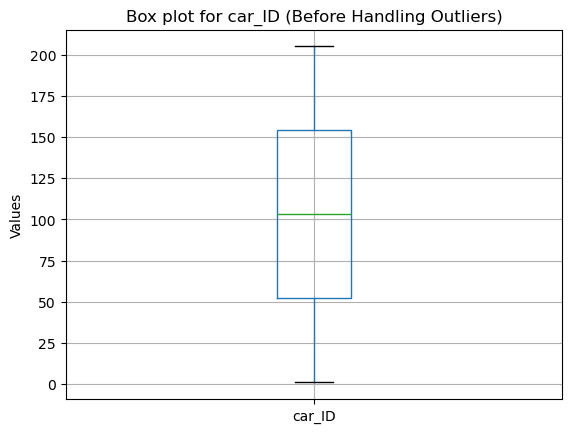

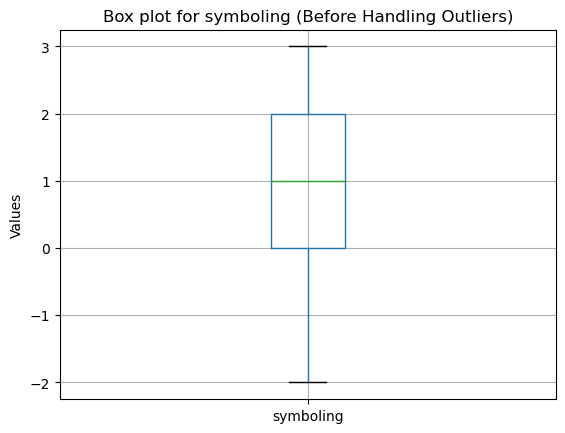

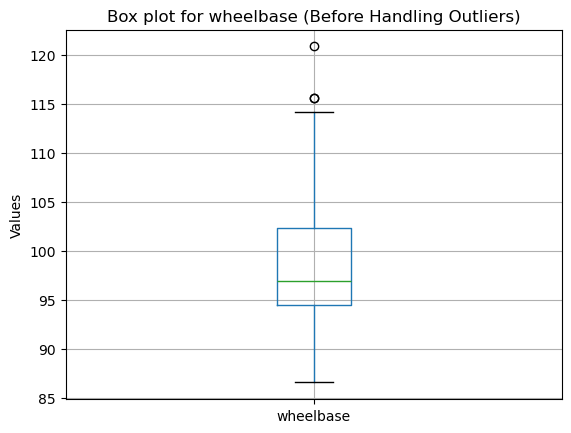

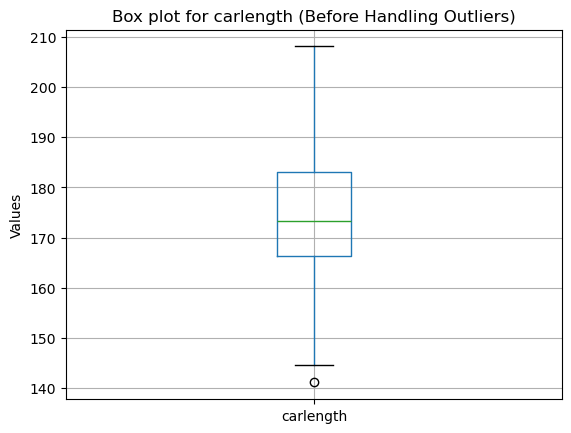

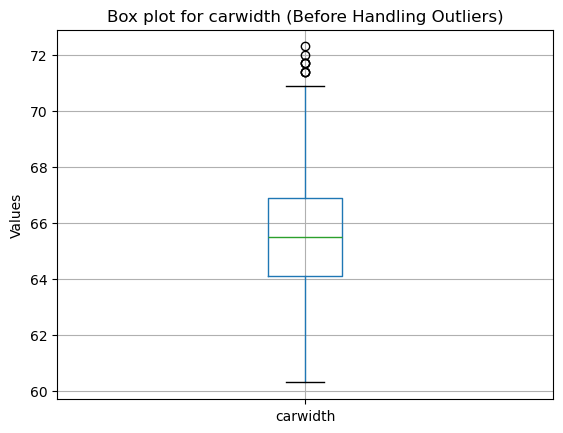

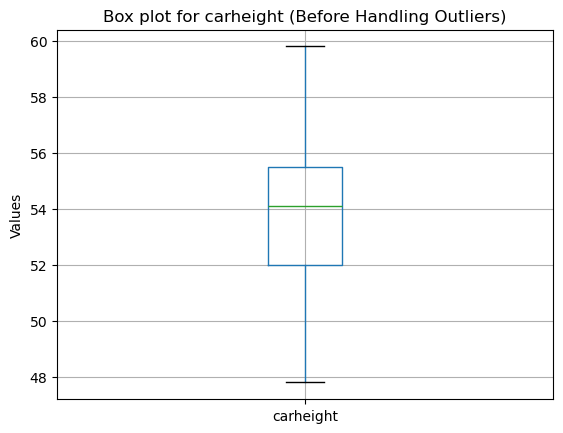

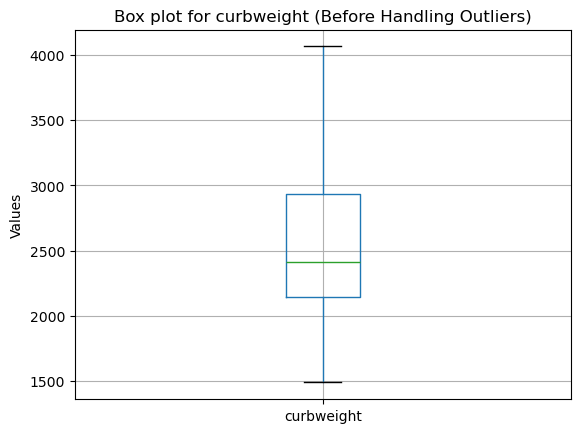

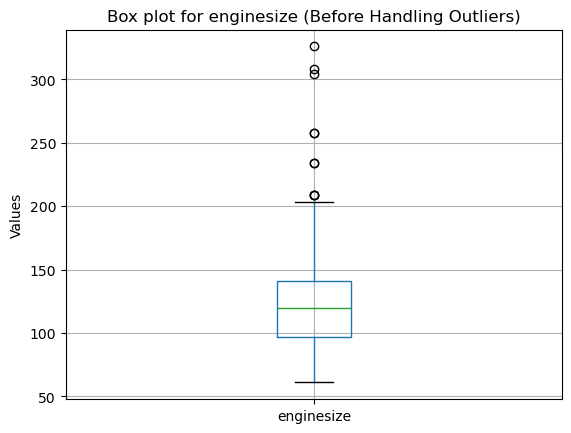

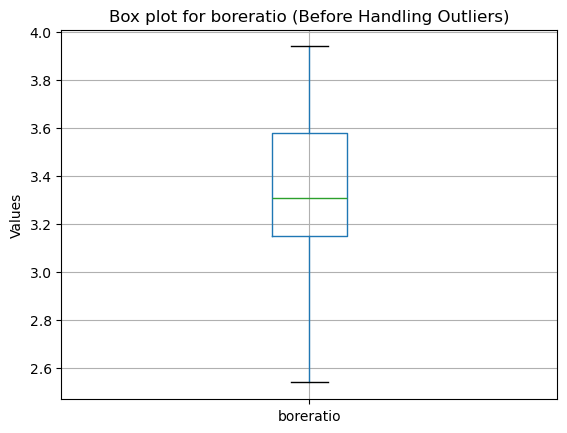

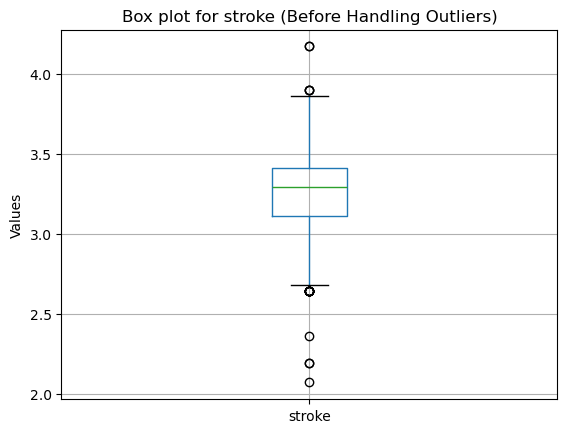

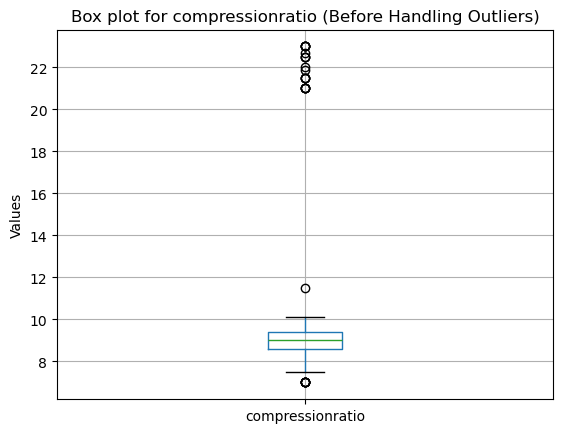

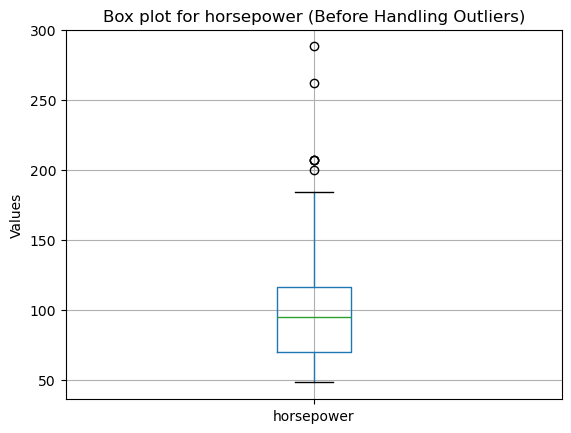

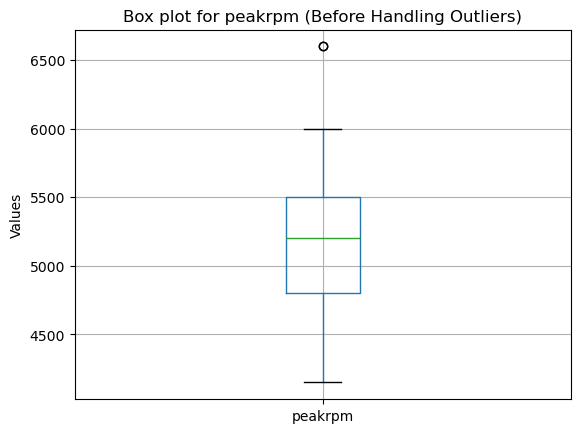

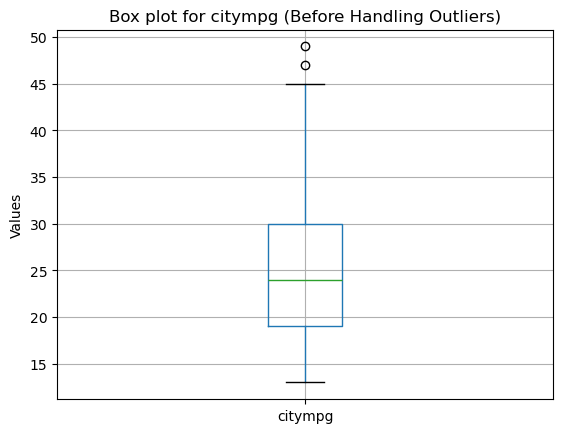

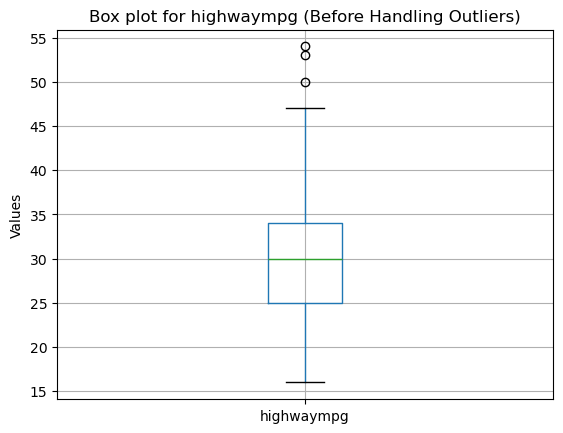

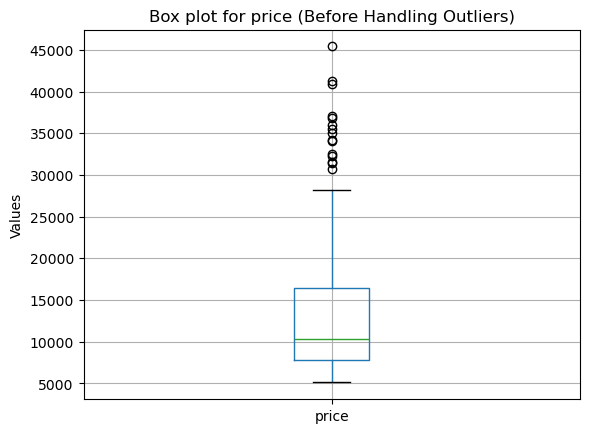

In [11]:
numeric_columns = df.select_dtypes(include=['number'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (Before Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

In [12]:
def handle_outlier(df):
    
    df = df.copy()
    for column in df.select_dtypes(include=['number']).columns:
        q1 = df[column].quantile(0.25)
        q3 = df[column].quantile(0.75)
        IQR = q3 - q1
        
        lower = q1 - 1.5 * IQR
        upper = q3 + 1.5 * IQR
        
        df[column] = df[column].apply(lambda x: 
                                      lower if x < lower else 
                                      upper if x > upper else x)
    return df

In [13]:
df1 = handle_outlier(df)

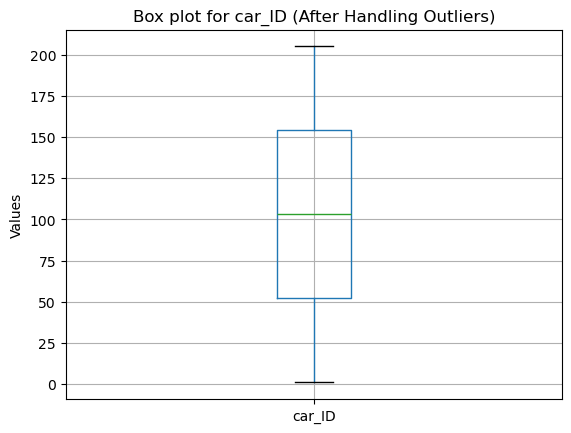

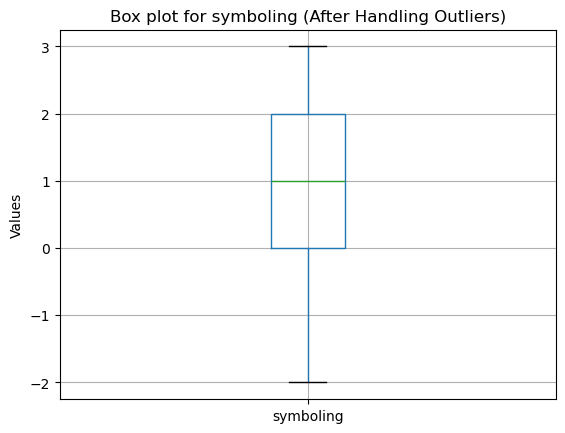

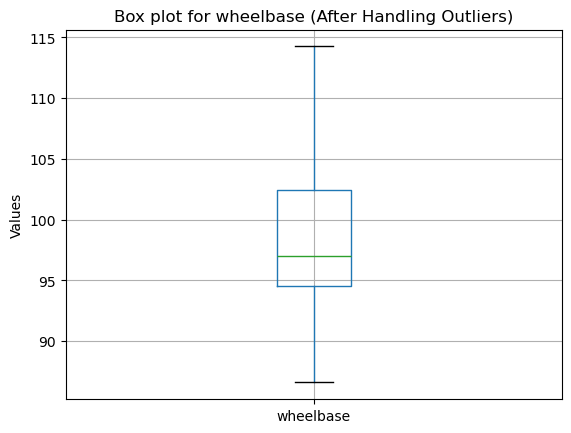

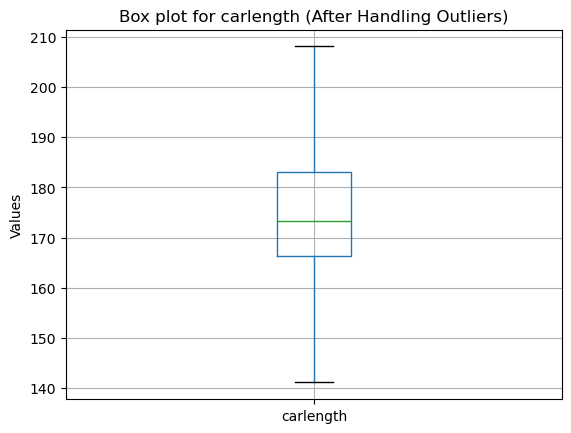

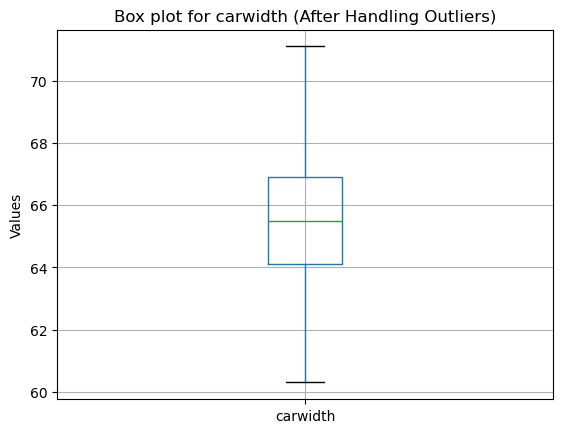

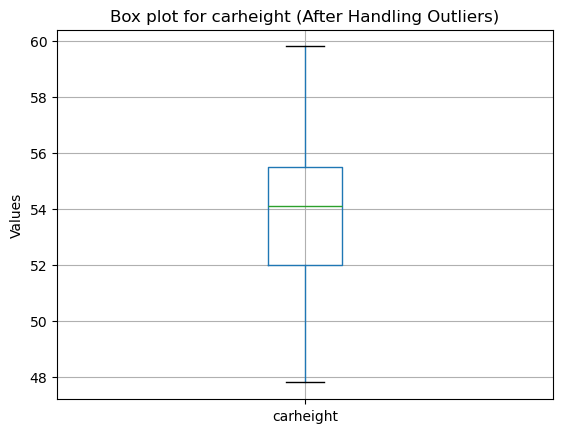

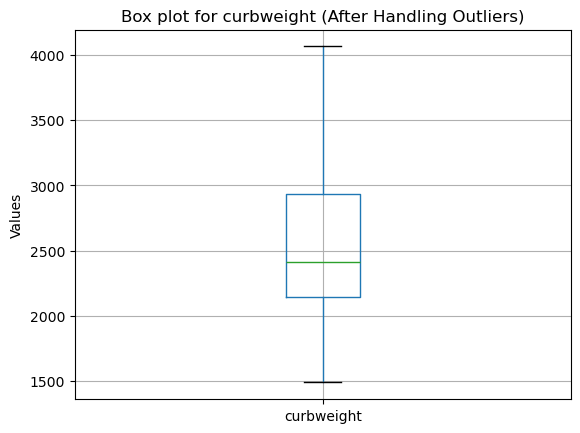

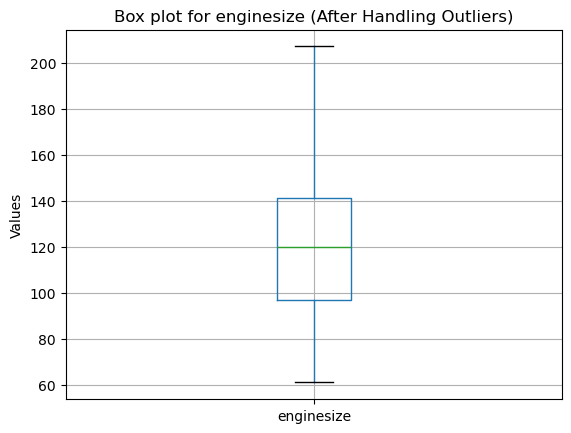

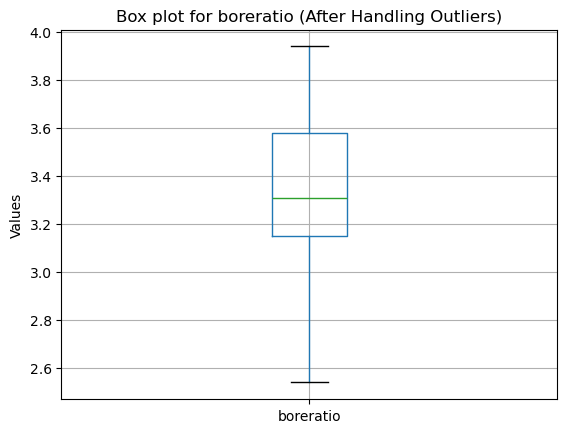

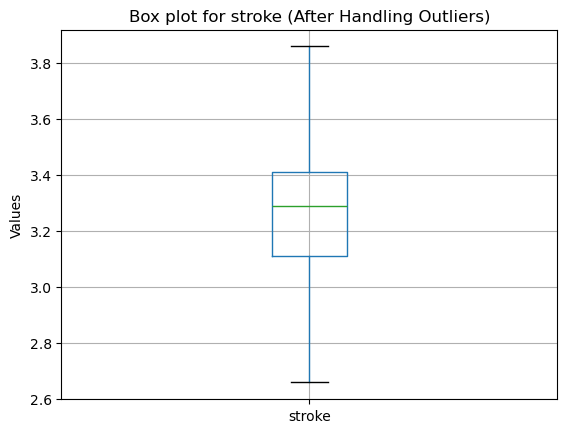

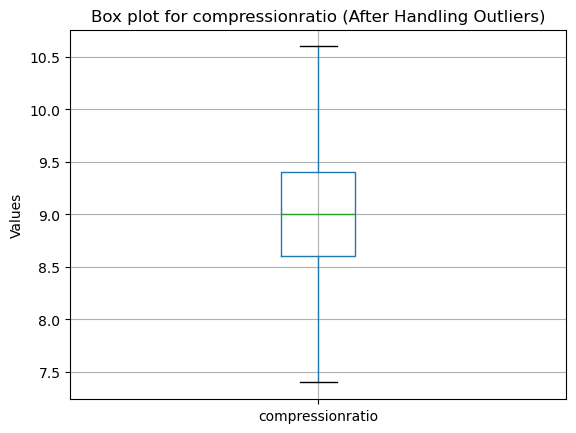

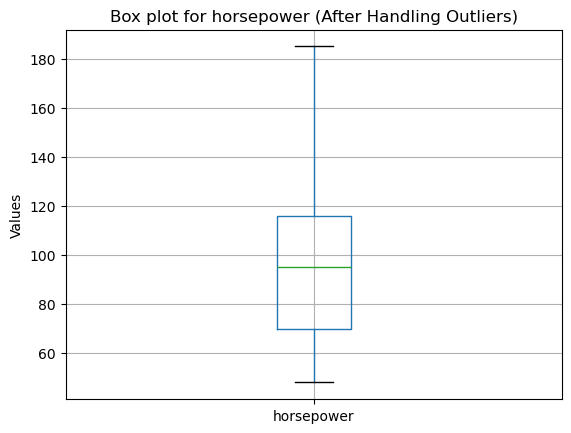

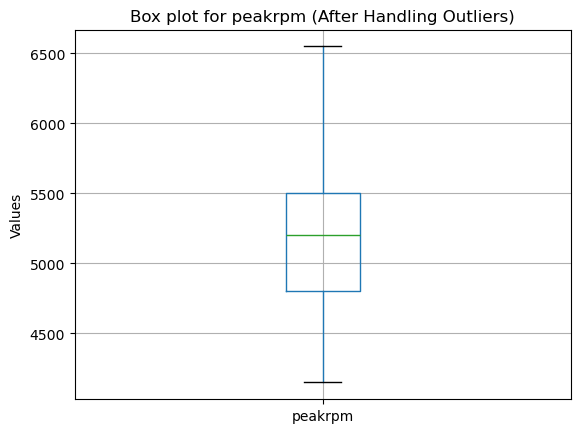

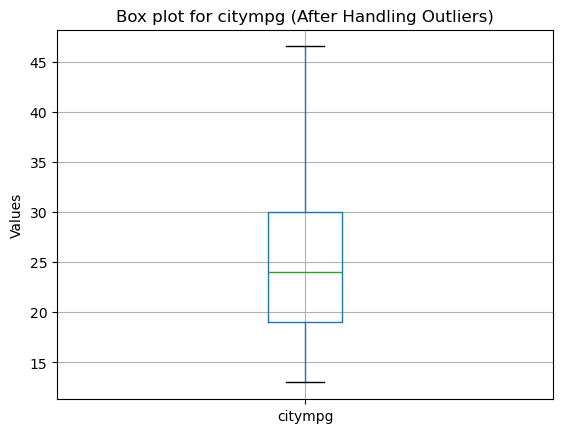

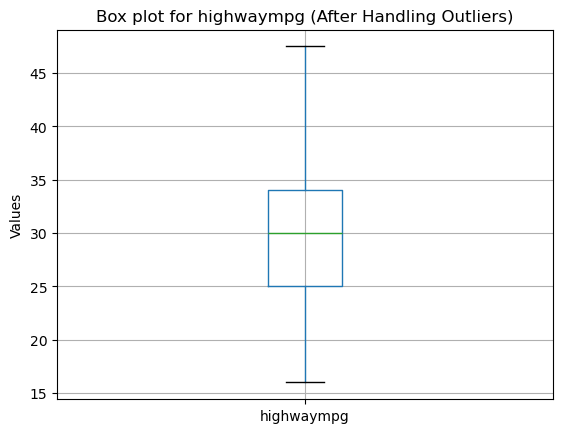

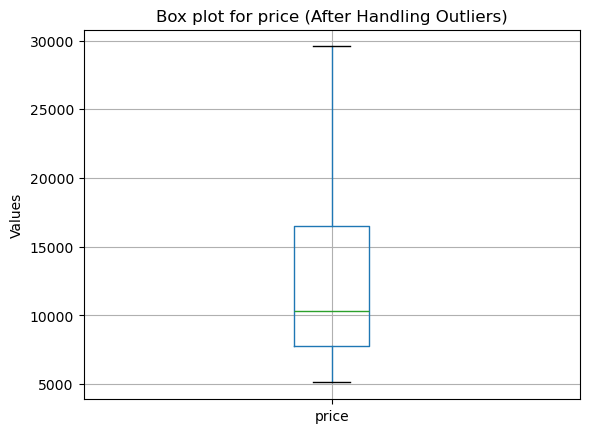

In [14]:
numeric_columns = df1.select_dtypes(include=['float64', 'int64'])
for column in numeric_columns.columns:
    plt.figure()
    numeric_columns.boxplot(column=column)
    plt.title(f"Box plot for {column} (After Handling Outliers)")
    plt.ylabel("Values")
    plt.show()

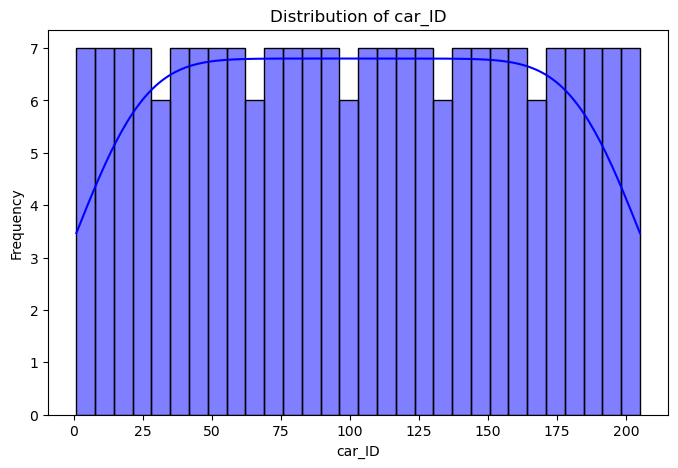

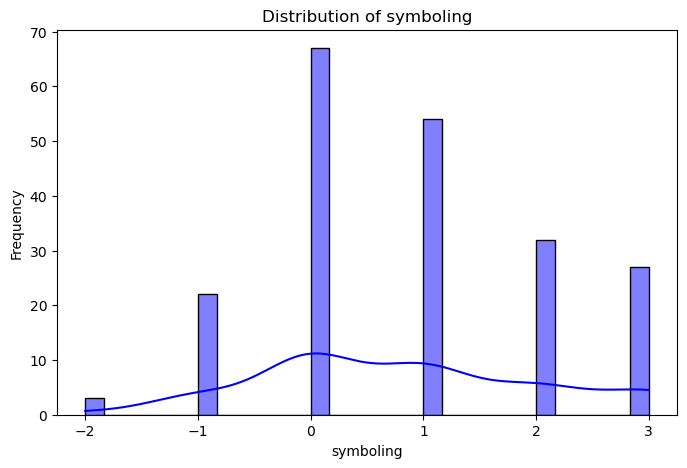

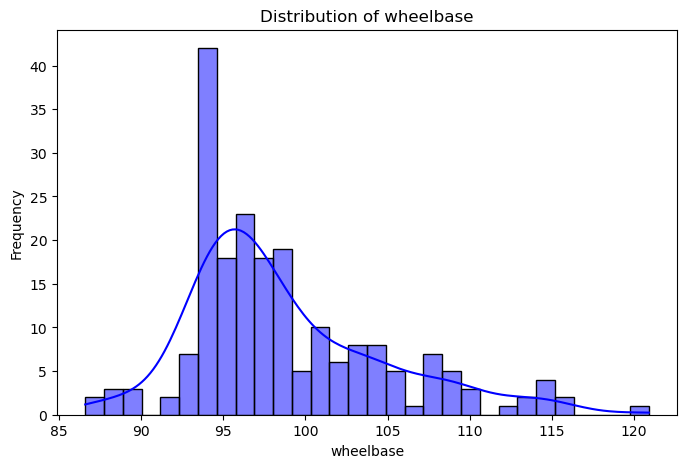

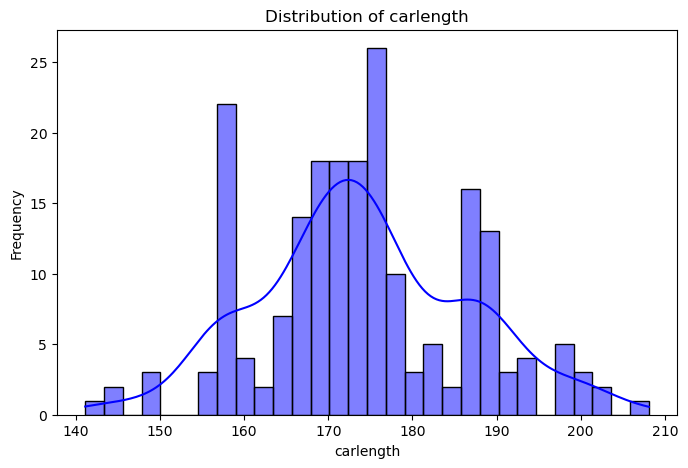

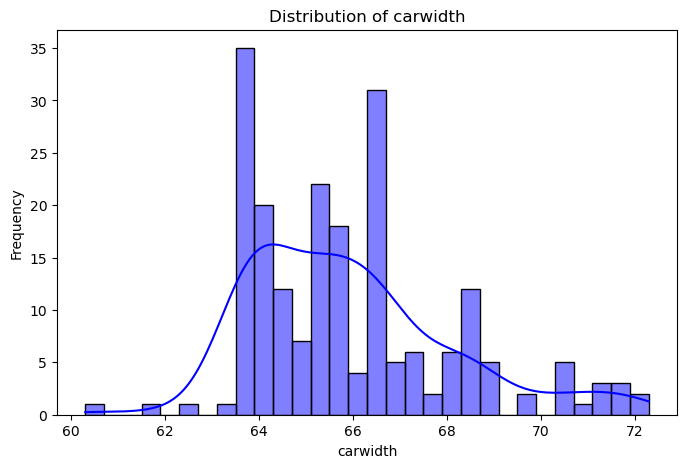

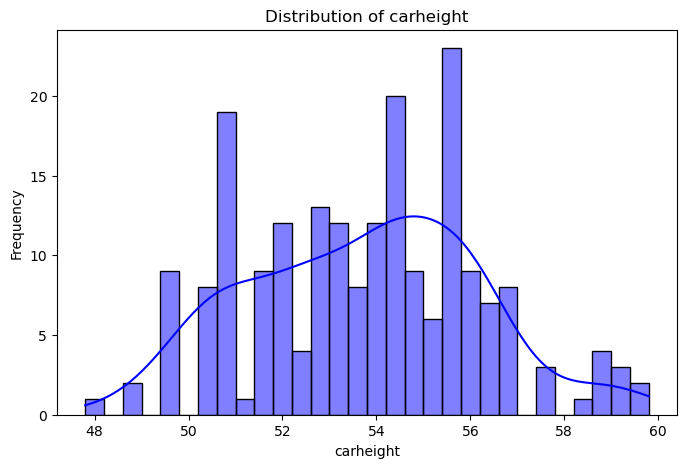

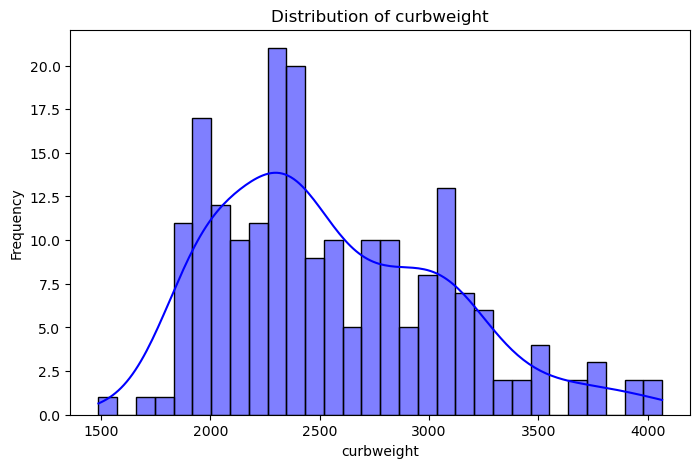

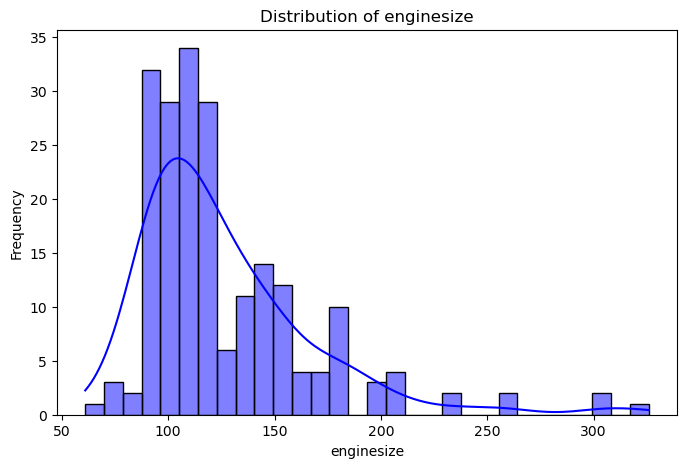

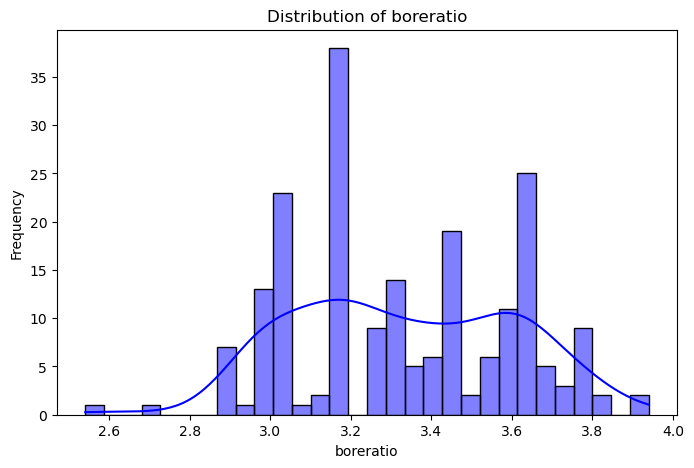

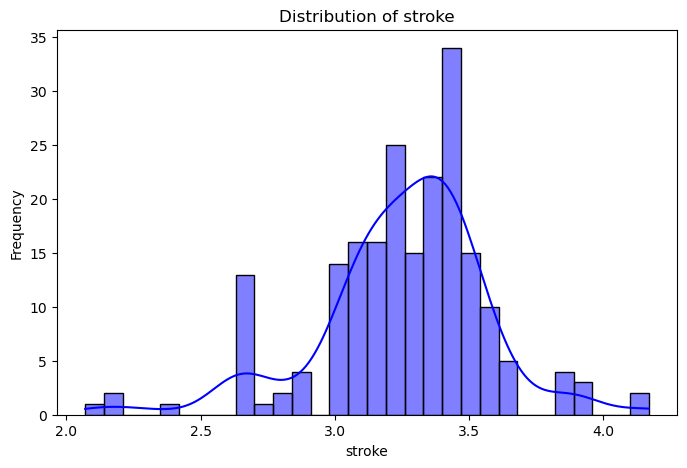

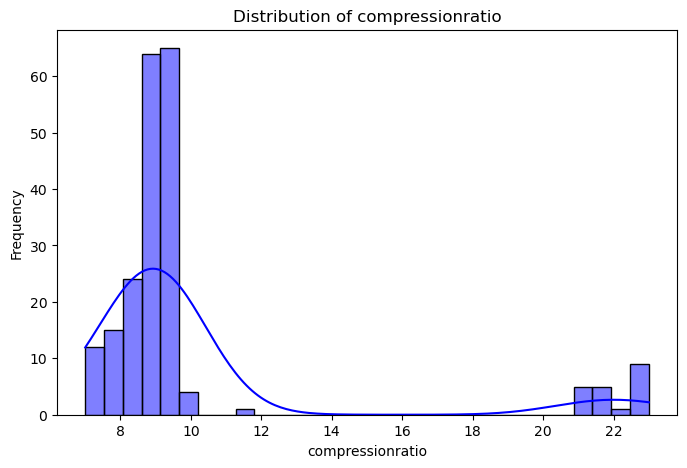

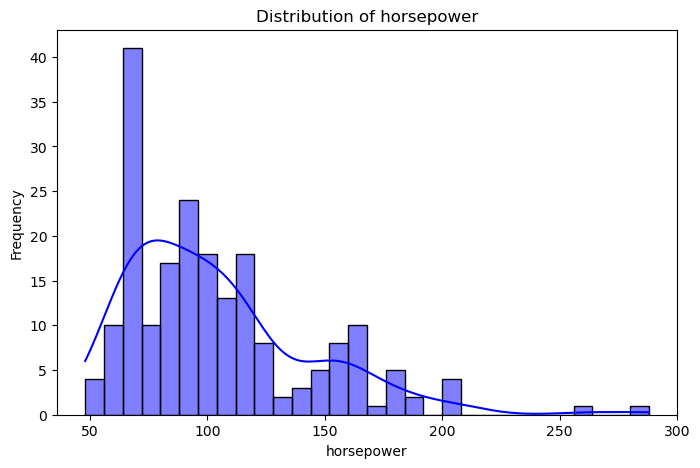

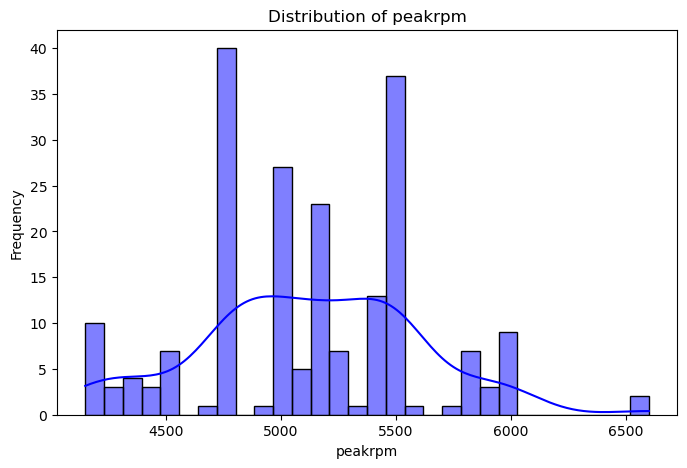

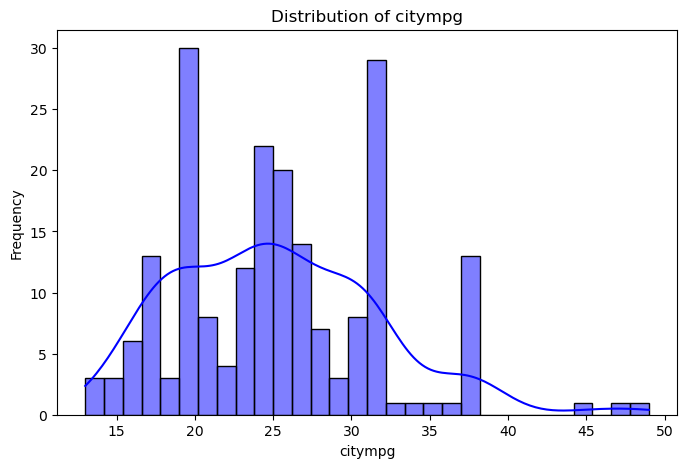

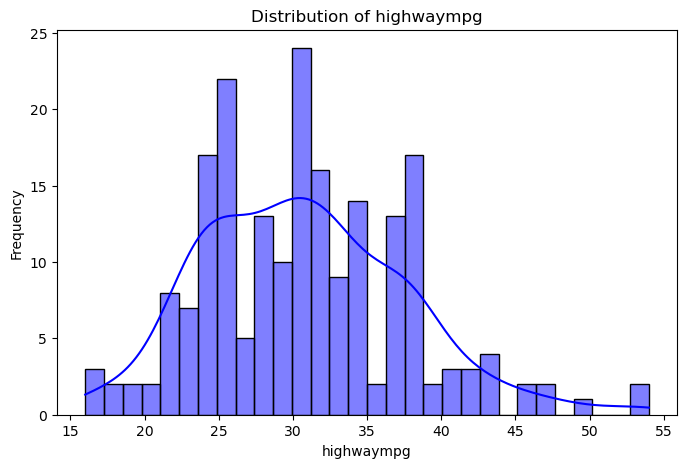

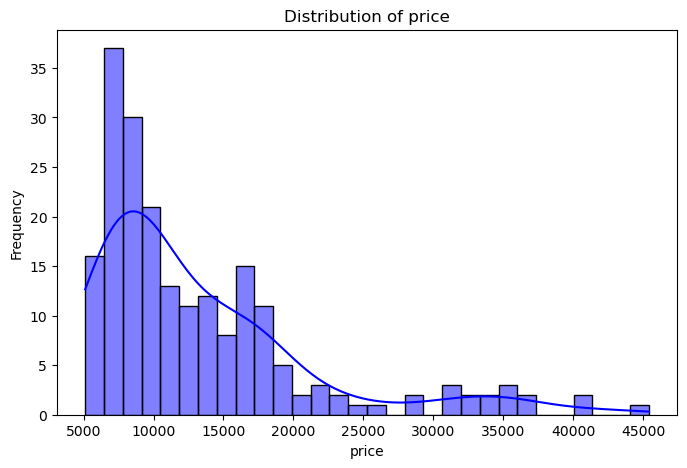

In [15]:
for column in numeric_columns.columns:
    plt.figure(figsize=(8, 5))
    sns.histplot(df[column], kde=True, bins=30, color='blue')
    plt.title(f"Distribution of {column}")
    plt.xlabel(column)
    plt.ylabel("Frequency")
    plt.show()

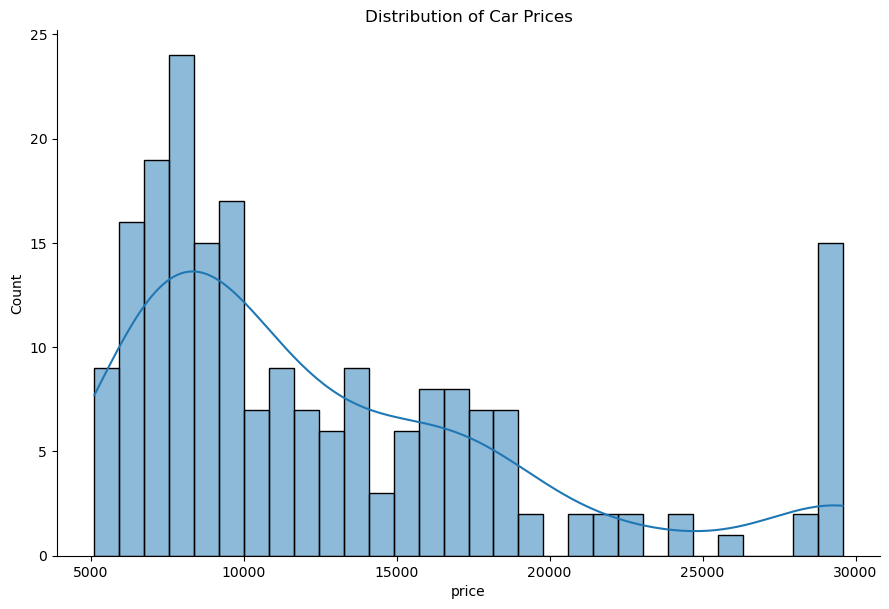

In [16]:
# Visualize Target Variable Distribution  
sns.displot(df1['price'], bins=30, kde=True, height=6, aspect=1.5)  
plt.title("Distribution of Car Prices")  
plt.show()  

In [17]:
# Power Transformation for Numerical Features  
numerical_features = df1.select_dtypes(include=['float64', 'int64']).columns  
pt = PowerTransformer(method='yeo-johnson')  
df1[numerical_features] = pt.fit_transform(df1[numerical_features])

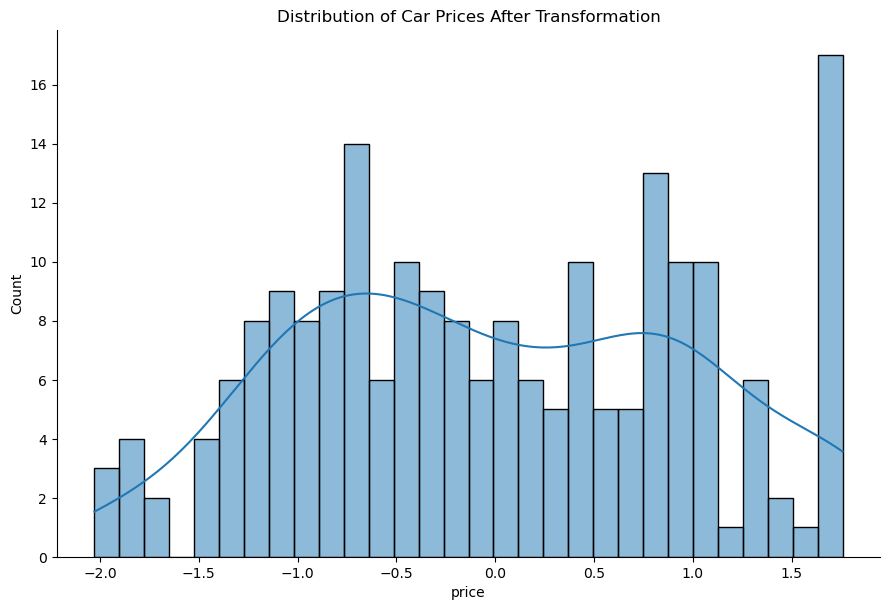

In [18]:
# Re-plot the distribution of the target variable after transformation  
sns.displot(df1['price'], bins=30, kde=True, height=6, aspect=1.5)  
plt.title("Distribution of Car Prices After Transformation")  
plt.show()  

In [19]:
# Split into features (X) and target (y)  
X = df1.drop('price', axis=1)  
y = df1['price']

In [20]:
# One-Hot Encoding for Categorical Variables  
X_encoded = pd.get_dummies(X, drop_first=True) 

In [21]:
# Feature Selection  
selector = SelectKBest(score_func=f_regression, k=10)  
X_selected = selector.fit_transform(X_encoded, y)  

In [22]:
# Get the names of the selected features  
selected_features = X_encoded.columns[selector.get_support()].tolist()  
print(f"Selected Features: {selected_features}")  

Selected Features: ['carlength', 'carwidth', 'curbweight', 'enginesize', 'horsepower', 'citympg', 'highwaympg', 'drivewheel_fwd', 'drivewheel_rwd', 'fuelsystem_2bbl']


In [23]:
# Train-test split  
X_train, X_test, y_train, y_test = train_test_split(X_encoded[selected_features], y, test_size=0.2, random_state=42) 

In [24]:
# Standardization of Features  
scaler = StandardScaler()  
X_train_scaled = scaler.fit_transform(X_train)  
X_test_scaled = scaler.transform(X_test)  

In [25]:
# Initialize models  
models = {  
    "Linear Regression": LinearRegression(),  
    "Decision Tree": DecisionTreeRegressor(random_state=42),  
    "Random Forest": RandomForestRegressor(random_state=42),  
    "Gradient Boosting": GradientBoostingRegressor(random_state=42),  
    "SVR": SVR()  
}  

In [64]:
# Model Evaluation  
results = {}  

for model_name, model in models.items():  
    # Fit the model  
    model.fit(X_train_scaled, y_train)  
    
    # Make predictions  
    y_pred = model.predict(X_test_scaled)  

    # Evaluate the model  
    mse = mean_squared_error(y_test, y_pred)  
    mae = mean_absolute_error(y_test, y_pred)  
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test,y_pred))

    # Store results  
    results[model_name] = {"MSE": mse, "MAE": mae, "R2": r2, "RMSE": rmse}

In [66]:
# Convert results to DataFrame for better visualization  
results_df = pd.DataFrame(results).T  
print("\nModel Evaluation Results:")  
print(results_df)  


Model Evaluation Results:
                        MSE       MAE        R2      RMSE
Linear Regression  0.141205  0.288678  0.855135  0.375772
Decision Tree      0.064584  0.195479  0.933742  0.254134
Random Forest      0.060538  0.185994  0.937893  0.246045
Gradient Boosting  0.063683  0.202419  0.934666  0.252355
SVR                0.212039  0.311394  0.782465  0.460477


In [68]:
# Identify the best performing model  
best_model_name = results_df['R2'].idxmax()  
print(f"\nBest Performing Model: {best_model_name}")  
print(f"Best Model Metrics: {results_df.loc[best_model_name]}") 


Best Performing Model: Random Forest
Best Model Metrics: MSE     0.060538
MAE     0.185994
R2      0.937893
RMSE    0.246045
Name: Random Forest, dtype: float64


In [70]:
# Hyperparameter Tuning for Random Forest  
param_grid = {  
    'n_estimators': [50, 100, 200],  
    'max_depth': [None, 10, 20, 30],  
    'min_samples_split': [2, 5, 10]  
}  

tuner = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=1)  
tuner.fit(X_train_scaled, y_train)  

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 10, 20, 30],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [50, 100, 200]},
             verbose=1)

In [71]:
# Get the best estimator and score  
best_estimator = tuner.best_estimator_  
best_score = tuner.best_score_  
print(f"\nBest Random Forest Model: {best_estimator}")  
print(f"Best Cross-Validation Score: {best_score}")


Best Random Forest Model: RandomForestRegressor(max_depth=10, n_estimators=200, random_state=42)
Best Cross-Validation Score: 0.8853736441802191


In [74]:
# Evaluate the tuned model  
y_pred_tuned = best_estimator.predict(X_test_scaled)  
mse_tuned = mean_squared_error(y_test, y_pred_tuned)  
mae_tuned = mean_absolute_error(y_test, y_pred_tuned)  
r2_tuned = r2_score(y_test, y_pred_tuned) 
rmse_tuned = np.sqrt(mean_squared_error(y_test,y_pred))

print(f"Tuned Random Forest Performance on Test Set:")  
print(f"MSE: {mse_tuned}")  
print(f"MAE: {mae_tuned}")  
print(f"R-squared: {r2_tuned}")
print(f"RMSE: {rmse_tuned}")

Tuned Random Forest Performance on Test Set:
MSE: 0.05914455903044993
MAE: 0.18434436662835607
R-squared: 0.9393224341597622
RMSE: 0.46047707633049034
